In [1]:
pip install plotly_express

     |████████████████████████████████| 13.2 MB 5.9 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=4de6b7c6c7de8367e56d8a0207272861c4ffed7417b644c72a0448f74a6bb2ad
  Stored in directory: /Users/astroraf/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
import pandas_profiling
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

warnings.filterwarnings('ignore')


sns.set_theme(style="white")

In [3]:
df = pd.read_csv('SDSS.csv')

In [4]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


## Exploratory Data Analysis

We first check if there are any NaN values to be accounted for. In this case there aren't

In [6]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

This function is used to help determine correlation above a set threshold

In [7]:
def high_corr(df, alpha = 0.7):
    corr = df[[cor for cor in df.columns if cor != 'class']].corr()

    corr_tuples = [(f, list(s[abs(s) > alpha].index)) for f,s in corr.iteritems()]

    for t1, t2 in corr_tuples:
        if t1 in t2:
            t2.remove(t1)

    corr_f = [t for t in corr_tuples if len(t[1]) != 0]

    highly_corr = []
    for t in corr_f:
        for f in t[1]:
            highly_corr.append(f)

    return list(set(highly_corr))

Here are some of the features that have a correlation greater than 0.7

In [8]:
high_corr(df)

['plate', 'run', 'dec', 'i', 'r', 'mjd', 'specobjid', 'g', 'u', 'z']

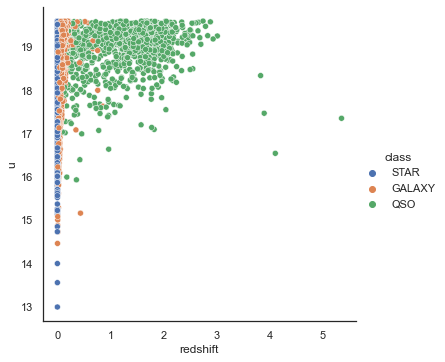

In [9]:
sns.relplot(x = 'redshift', y = 'u', hue = 'class', data = df)

In [10]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

We are taking the classification of the element in space and creating a separate variable for them

In [11]:
space_class = df['class']

turning the classes into numbers

In [12]:
space_class.replace({"STAR": 1, "GALAXY": 2, "QSO": 3}, inplace=True)

Droping Columns that we don't need

In [13]:
df.drop(['run', 'rerun', 'class', 'camcol', 'field', 'objid', 'specobjid', 'fiberid', 'plate', 'mjd'], axis = 1, inplace= True)

Renaming the remaining columns

In [14]:
df.rename(columns={'ra': 'r_ascension', 'dec': 'declination', 'u': 'uv', 'g': 'g_band', 'r': 'r_band', 'i': 'infra', 'z': 'n_infra'}, inplace = True)

Doing a train-test-split on the data

In [15]:
data_train, data_test, target_train, target_test = train_test_split(df, space_class, test_size = 0.2, random_state = 42)


# Logistic Regression

In [16]:
# Instantiate a Logistic Regression Model (liblinear is recommende for small datasets)
logreg = LogisticRegression(C=1e5, solver='liblinear')

# fit the model 
logreg_model = logreg.fit(df,space_class)

In [17]:
coef = logreg_model.coef_
interc = logreg_model.intercept_

In [18]:
log_train_pred = logreg.predict(data_train)
log_test_pred = logreg.predict(data_test)

# //// If we want to find the AUC we need to get this down to 2 classes instead of 3 ////

In [19]:
# Calculate the probability scores of each point in the training set
target_train_score = logreg_model.decision_function(data_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(target_train, target_train_score)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

#Here is the code to plot it if we get it to work

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

ValueError: multiclass format is not supported

# //// this is the formula for calc TPR, FPR, and test threshold ////

# Decision Tree Classifier

In [20]:
dtree_c = DecisionTreeClassifier(max_depth = 2) 
dtree_c.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
d_tree_pred = dtree_c.predict(data_test)

In [22]:
d_tree_pred = np.round(d_tree_pred)

# Random Forest Classifier

In [ ]:
jungle = RandomForestClassifier(n_estimators=100, max_depth= 5)
jungle.fit(data_train, target_train)

In [ ]:
jungle_pred = jungle.predict(data_test)

In [ ]:
print ("\nClassification report Random Forest Classifier:\n",(classification_report(target_test, jungle_pred)))

# Using GridSearchCV to optimize

In [ ]:
dt_param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [ ]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(jungle, dt_param_grid, cv=5, return_train_score=True, verbose = 1)

# Fit to the data
dt_grid_search.fit(data_train, target_train)

In [ ]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Mean training score 2
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Mean training score 3
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Mean training score 4
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Mean training score 5 with 100 =n and 5 cv
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
# Mean training score 6 with 100 =n and 5 cv % original grama grid
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
df

In [ ]:
bands = df[['uv', 'g_band', 'r_band', 'infra', 'n_infra']]

In [ ]:
redshift = df['redshift']

In [ ]:
n_class = df['class']

In [ ]:
#Do this right after DF without any changes

aux=df.groupby('class').aggregate('mean')
gz=aux[['u','g','r','i','z']].T
gz['photometric variable']=gz.index

fig = px.scatter(gz, x='photometric variable',y=['GALAXY','QSO','STAR'],
        title="Mean values for each photometric variable (u,g,r,iz) per class ",
                 color_discrete_sequence=px.colors.qualitative.Safe).update_traces(dict(marker_line_width=1,
        marker_size=16,marker_line_color="black",mode='markers+lines')).update_layout( 
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')

fig.show()



In this figure we can observe the different mean values of each photometric variable for each astronomical object.

    We observe that in all the photometric bands, the quasars have higher mean values, although the difference in ultraviolet is not very high.

    Galaxies and stars have very similar mean values in all variables, but in u i and z there is a divergence that can be key to predicting classes.



# Box

In [ ]:
box = pd.concat([n_class,bands],axis=1)

box = pd.concat([n_class,bands],axis=1)
box = pd.melt(box,id_vars="class",
                    var_name="Photometric System",
                    value_name='value')

fig = px.box(box, x="Photometric System",y='value',title='Box plots - Photometric System (u, g, r, i, z)',
             color_discrete_sequence=px.colors.qualitative.Safe).update_traces(dict(marker_line_width=1, 
marker_line_color="black")).update_layout( paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')
fig.show()

In [ ]:
n_class

In [ ]:
fig = px.box(box, x="Photometric System",y='value',color='class',title='Box plots - Photometric System (u, g, r, i, z) by class',
             color_discrete_sequence=px.colors.qualitative.Safe).update_traces(dict(marker_line_width=1, marker_line_color="black")).update_layout( paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')
fig.show()

# Bagging Classifier

In [ ]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(max_depth=5), 
                                 n_estimators=20, n_jobs = -1, oob_score=True, verbose= 1)

In [ ]:
bagged_tree.fit(data_train, target_train)

# Adaboost Classifier

In [ ]:
adaboost_clf = AdaBoostClassifier(random_state=42)

adaboost_clf.fit(data_train, target_train)

In [ ]:
adaboost_train_preds = adaboost_clf.predict(data_train)
adaboost_test_preds = adaboost_clf.predict(data_test)

# Gradient Boosting Blassifier

In [ ]:
gbt_clf = GradientBoostingClassifier(random_state=42)

gbt_clf.fit(data_train, target_train)

In [ ]:
gbt_clf_train_preds = gbt_clf.predict(data_train)
gbt_clf_test_preds = gbt_clf.predict(data_test)

# Results

In [ ]:
print ("\nClassification report Logisitic Regression:\n",(classification_report(target_test, log_test_pred)))

print ("\nClassification report Decision Tree Classifier:\n",(classification_report(target_test, d_tree_pred)))

print ("\nClassification report AdaBoost Classifier:\n",(classification_report(target_test, adaboost_test_preds)))

print ("\nClassification report Gradient Boost Classifier:\n",(classification_report(target_test, gbt_clf_test_preds)))

print ("\nClassification report Random Forest Classifier Train:\n", (jungle.score(data_train, target_train))) 

print ("\nClassification report Random Forest Classifier Test:\n", (jungle.score(data_test, target_test))) 

print ("\nClassification report Bagging Classifier Train:\n", (bagged_tree.score(data_train, target_train)))

print ("\nClassification report Bagging Classifier Test:\n", (bagged_tree.score(data_test, target_test)))

# Finding Baseline

In [ ]:
dt_reg = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_reg, data_train, target_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

In [ ]:
rf_reg = RandomForestClassifier()

rf_cv_score = cross_val_score(rf_reg, data_train, target_train, cv=3)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

In [ ]:
lg_reg = LogisticRegression()

lg_cv_score = cross_val_score(lg_reg, data_train, target_train, cv=3)
mean_lg_cv_score = np.mean(lg_cv_score)

print(f"Mean Cross Validation Score: {mean_lg_cv_score :.2%}")

In [ ]:
bag_reg = BaggingClassifier(DecisionTreeClassifier(max_depth=5))

bag_reg_score = cross_val_score(bag_reg, data_train, target_train, cv=3)
mean_bag_reg_score = np.mean(bag_reg_score)

print(f"Mean Cross Validation Score: {mean_bag_reg_score :.2%}")  

In [ ]:
adaboost = AdaBoostClassifier()

adaboost_cv_score = cross_val_score(adaboost, data_train, target_train, cv=3)
mean_adaboost_cv_score = np.mean(adaboost_cv_score)

print(f"Mean Cross Validation Score: {mean_adaboost_cv_score :.2%}")

In [ ]:
gbt = GradientBoostingClassifier()

gbt_cv_score = cross_val_score(gbt, data_train, target_train, cv=3)
mean_gbt_cv_score = np.mean(gbt_cv_score)

print(f"Mean Cross Validation Score: {mean_gbt_cv_score :.2%}")

# Setting up ROC and AUC values for the model thresholds

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, log_test_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

this is the AUC score

In [ ]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

this is the cross validated AUC score

In [ ]:
cross_val_score(logreg, df, space_class, cv=10, scoring='roc_auc').mean()

# Optimizing Alpha

In [ ]:
# train_mse = []
# test_mse = []
# alphas = []

# for alpha in np.linspace(0, 200, num=50):
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train_all, y_train)
    
#     train_preds = lasso.predict(X_train_all)
#     train_mse.append(mean_squared_error(y_train, train_preds))
    
#     test_preds = lasso.predict(X_test_all)
#     test_mse.append(mean_squared_error(y_test, test_preds))
    
#     alphas.append(alpha)

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(alphas, train_mse, label='Train')
# ax.plot(alphas, test_mse, label='Test')
# ax.set_xlabel('Alpha')
# ax.set_ylabel('MSE')

# # np.argmin() returns the index of the minimum value in a list
# optimal_alpha = alphas[np.argmin(test_mse)]

# # Add a vertical line where the test MSE is minimized
# ax.axvline(optimal_alpha, color='black', linestyle='--')
# ax.legend();

# print(f'Optimal Alpha Value: {int(optimal_alpha)}')

In [ ]:
cf_matrix_dt = confusion_matrix(target_test, log_test_pred)
print(cf_matrix_dt)


In [ ]:
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix_dt.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(4,4)
sns.heatmap(cf_matrix_dt, annot=True, fmt='', cmap='Blues');

In [ ]:
sns.pairplot(data = df, palette = 'Dark2', hue = space_class)

In [ ]:
df.columns

In [ ]:
sns.relplot(x = 'redshift', y = 'r_band', hue = space_class, data = df)

In [ ]:
sns.relplot(x = 'redshift', y = 'uv', hue = space_class, data = df)

In [ ]:
sns.relplot(x = 'redshift', y = 'g_band', hue = space_class, data = df)

In [ ]:
sns.relplot(x = 'redshift', y = 'infra', hue = space_class, data = df)

In [ ]:
sns.relplot(x = 'redshift', y = 'n_infra', hue = space_class, data = df)

## Start 2

We have a dataframe with columns dropped and renamed

In [ ]:
df

We have a series with the class of the rows

In [ ]:
space_class

We run a basic decision tree regressor over the dataframe with a depth of 2

In [ ]:
dtree_c = DecisionTreeRegressor(max_depth = 2) 
dtree_c.fit(data_train, target_train)

In [ ]:
pred = dtree_c.predict(data_test)

In [ ]:
target_test

In [ ]:
target_test = pd.to_numeric(target_test, downcast="float")

In [ ]:
type(target_test)

In [ ]:
x = np.round(pred)

In [ ]:
type(x[0])

In [ ]:
type(y_test)

In [ ]:
cf_matrix_dt = confusion_matrix(target_test, x)
print(cf_matrix_dt)

In [ ]:
#confusion_matrix(y_test, pred)

#print(classification_report(X_test, y_1))
print(classification_report (target_test, d_tree_pred))

#classification_report(y_test, pred.round(), normalize = False)

In [ ]:
np.argmax(pred)

We do a feature immportance method and plot the results

In [ ]:
dtree_df.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(jungle)

## Creating a baseline model: Decision Tree

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df, space_class, random_state=42)

In [ ]:
dt_reg = DecisionTreeRegressor()

dt_cv_score = cross_val_score(dt_reg, data_train, target_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

In [ ]:
rf_reg = RandomForestRegressor()

rf_cv_score = cross_val_score(rf_reg, data_train, target_train, cv=3)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

In [ ]:
lg_reg = LogisticRegression()

lg_cv_score = cross_val_score(lg_reg, data_train, target_train, cv=3)
mean_lg_cv_score = np.mean(lg_cv_score)

print(f"Mean Cross Validation Score: {mean_lg_cv_score :.2%}")

In [ ]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=5))

bag_reg_score = cross_val_score(bag_reg, data_train, target_train, cv=3)
mean_bag_reg_score = np.mean(bag_reg_score)

print(f"Mean Cross Validation Score: {mean_bag_reg_score :.2%}")                           

Pretty Good Accuracy for a baseline

## Establishing Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

In [ ]:
forest.score(data_train, target_train)

In [ ]:
forest.score(data_test, target_test)

In [ ]:
plot_feature_importances(forest)

In [ ]:
jungle = RandomForestRegressor(n_estimators=100, max_depth= 5)
jungle.fit(data_train, target_train)

In [ ]:
jungle.score(data_train, target_train)

In [ ]:
jungle.score(data_test, target_test)

In [ ]:
plot_feature_importances(jungle)

## Creating Bagging Classifiers

In [ ]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20, n_jobs = -1, oob_score=True, verbose= 1)

In [ ]:
bagged_tree.fit(data_train, target_train)

In [ ]:
bagged_tree.score(data_train, target_train)

In [ ]:
bagged_tree.score(data_test, target_test)